
# Loan Application Status Prediction

Project Description
This dataset includes details of applicants who have applied for loan. 
The dataset includes details like credit history, loan amount, their 
income, dependents etc. 
Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

Dataset Link-  
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Loan%20Application%20Status/loan_prediction.csv

In [130]:
path_name = "/Users/geetanjalijoshi/Desktop/Datatrained /datasets /loan_prediction.csv"

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
# load csv file 
df = pd.read_csv(path_name)
df.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [133]:
new_columns = ["Loan_ID", "Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area", "Loan_Status"]

# Rename columns
df.columns = new_columns
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            613 non-null    object 
 1   Gender             600 non-null    object 
 2   Married            610 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      581 non-null    object 
 6   ApplicantIncome    613 non-null    int64  
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   599 non-null    float64
 10  Credit_History     563 non-null    float64
 11  Property_Area      613 non-null    object 
 12  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [135]:
df.nunique()

Loan_ID              613
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      504
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [136]:
df['Gender'].value_counts()

Male      488
Female    112
Name: Gender, dtype: int64

In [137]:
df['Married'].value_counts()

Yes    398
No     212
Name: Married, dtype: int64

In [138]:
df['Dependents'].value_counts()

0     344
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [139]:
df['Dependents'].isnull().sum()

15

In [143]:
df['Dependents'] = df['Dependents'].replace('3+',3)

In [144]:
df['Education'].value_counts()

Graduate        479
Not Graduate    134
Name: Education, dtype: int64

In [145]:
df['Self_Employed'].value_counts()

No     499
Yes     82
Name: Self_Employed, dtype: int64

In [146]:
df['Credit_History'].value_counts()

1.0    474
0.0     89
Name: Credit_History, dtype: int64

In [147]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        201
Rural        179
Name: Property_Area, dtype: int64

In [148]:
df['Loan_Status'].value_counts()

Y    421
N    192
Name: Loan_Status, dtype: int64

In [149]:
df['Loan_Amount_Term'].value_counts()

360.0    511
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [150]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [151]:
# dropping load_id column
df = df.drop(['Loan_ID'],axis=1)

In [152]:
# check for null values 
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [153]:
# filling null values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [154]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

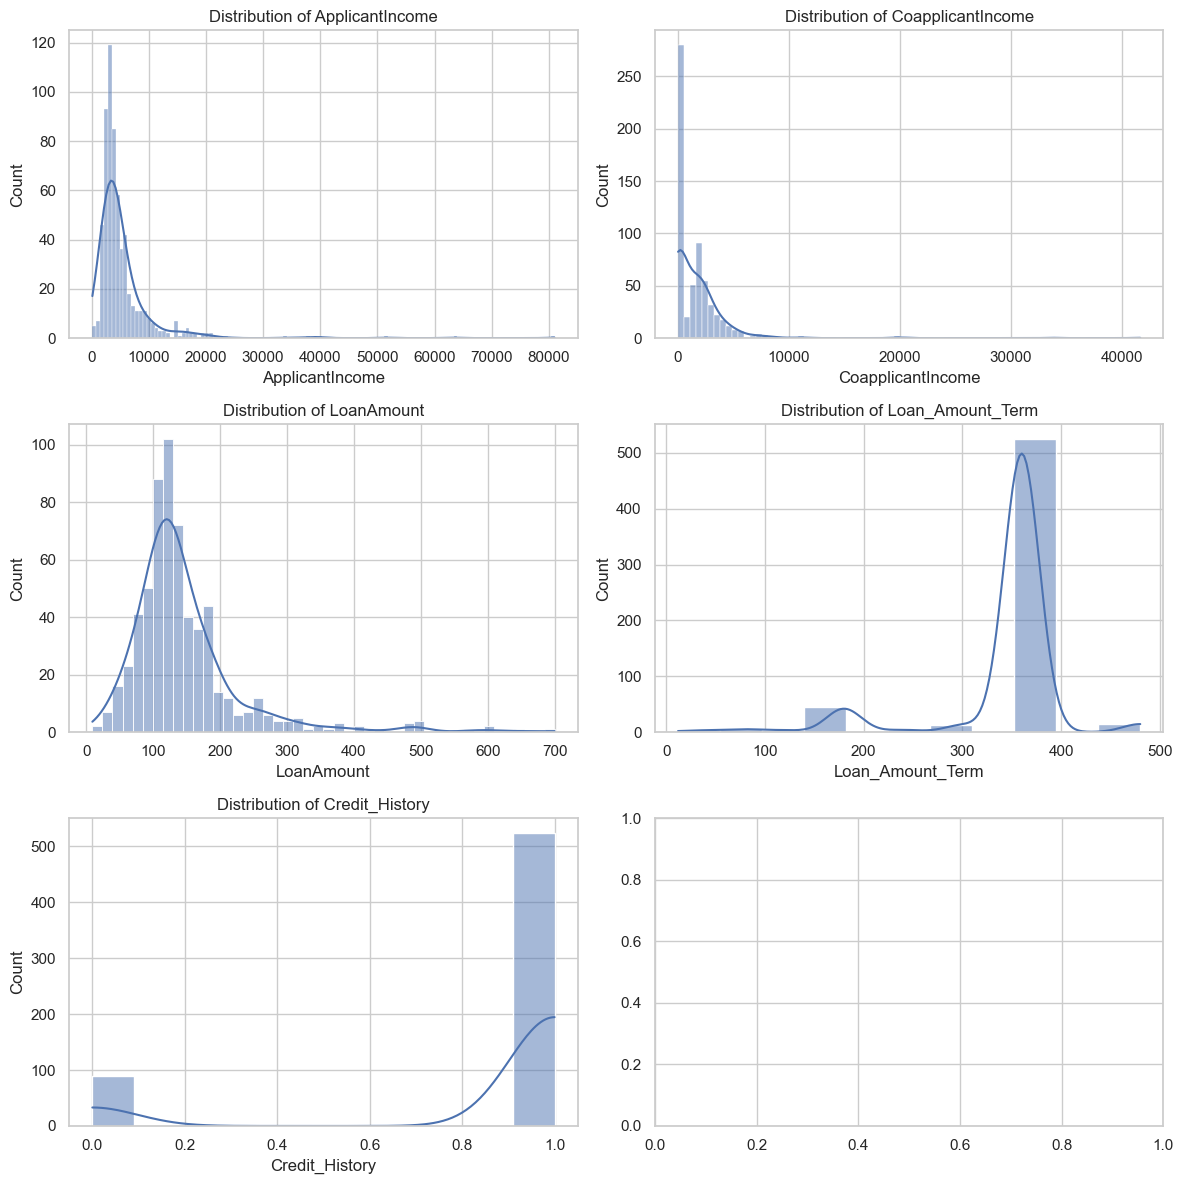

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Plot distributions of numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {feature}')
plt.tight_layout()

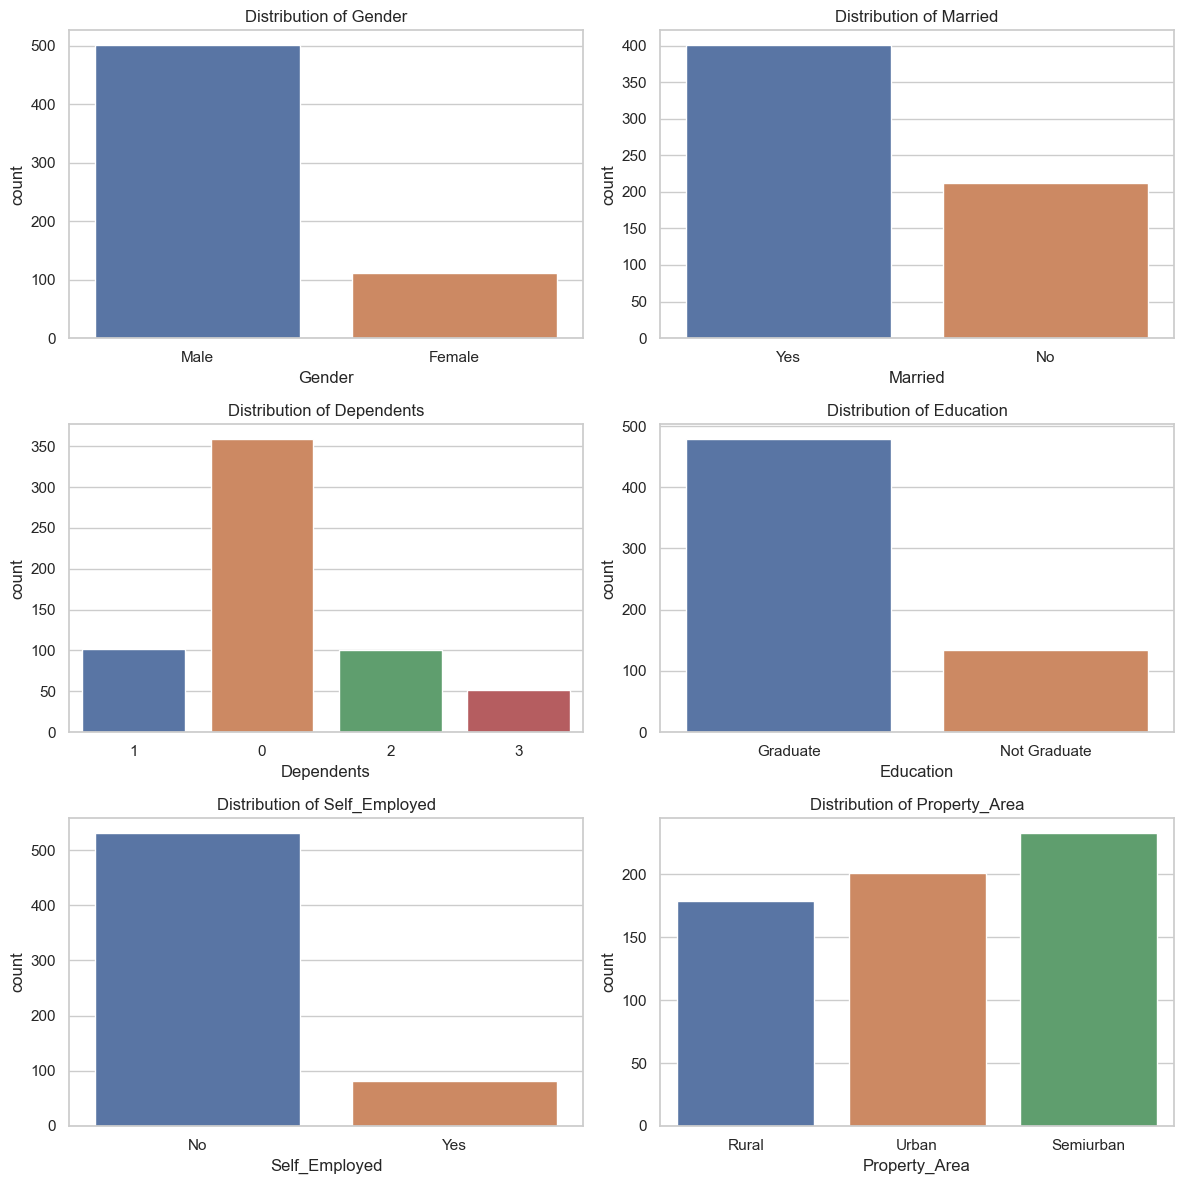

In [156]:
# Plot distributions of categorical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {feature}')
plt.tight_layout()

<Axes: xlabel='Loan_Status', ylabel='count'>

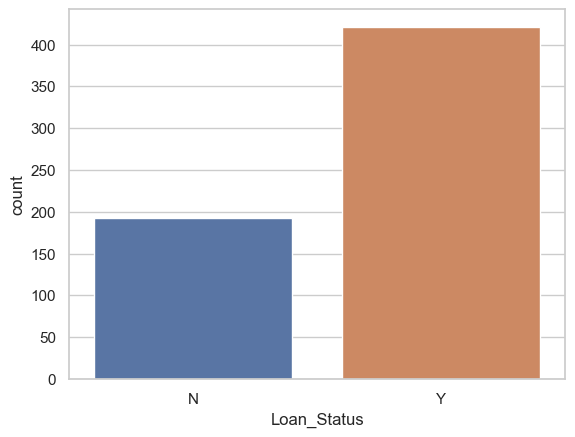

In [157]:
# attrition count

sns.countplot(x = df.Loan_Status)

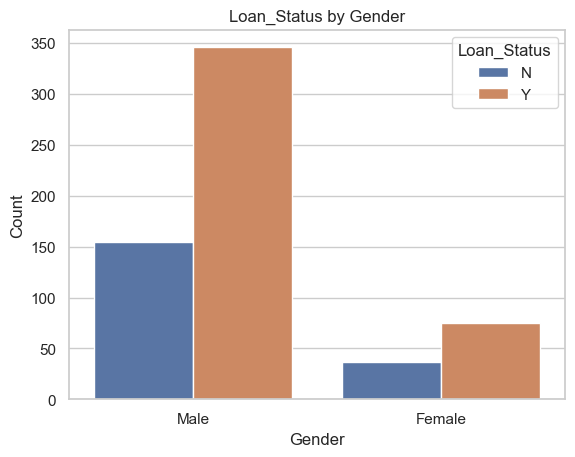

In [158]:
# Gender vs Loan_Status
sns.countplot(hue=df['Loan_Status'], x=df['Gender'])
plt.title('Loan_Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/var/folders/50/wd3xwy3j453gvdx9x80g5_140000gn/T/ipykernel_59940/3520323619.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


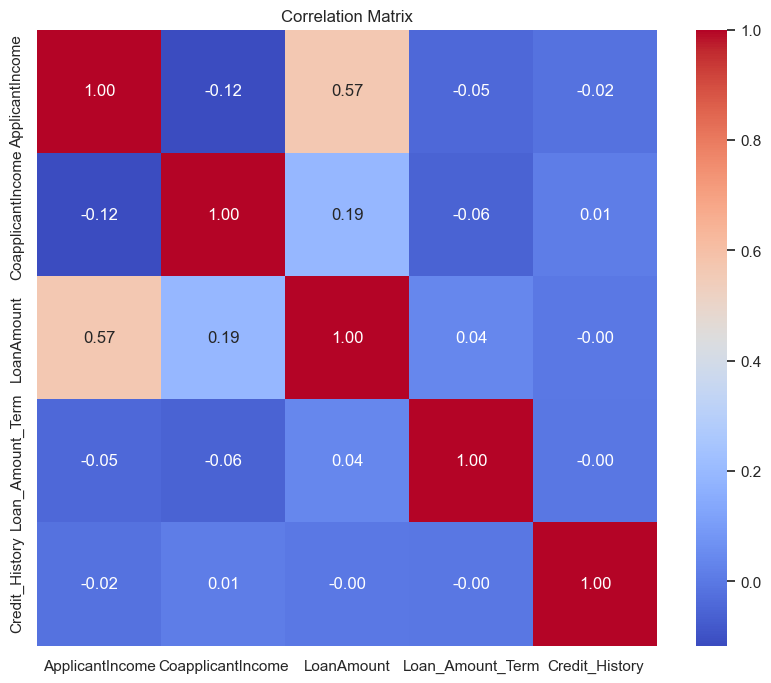

In [159]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

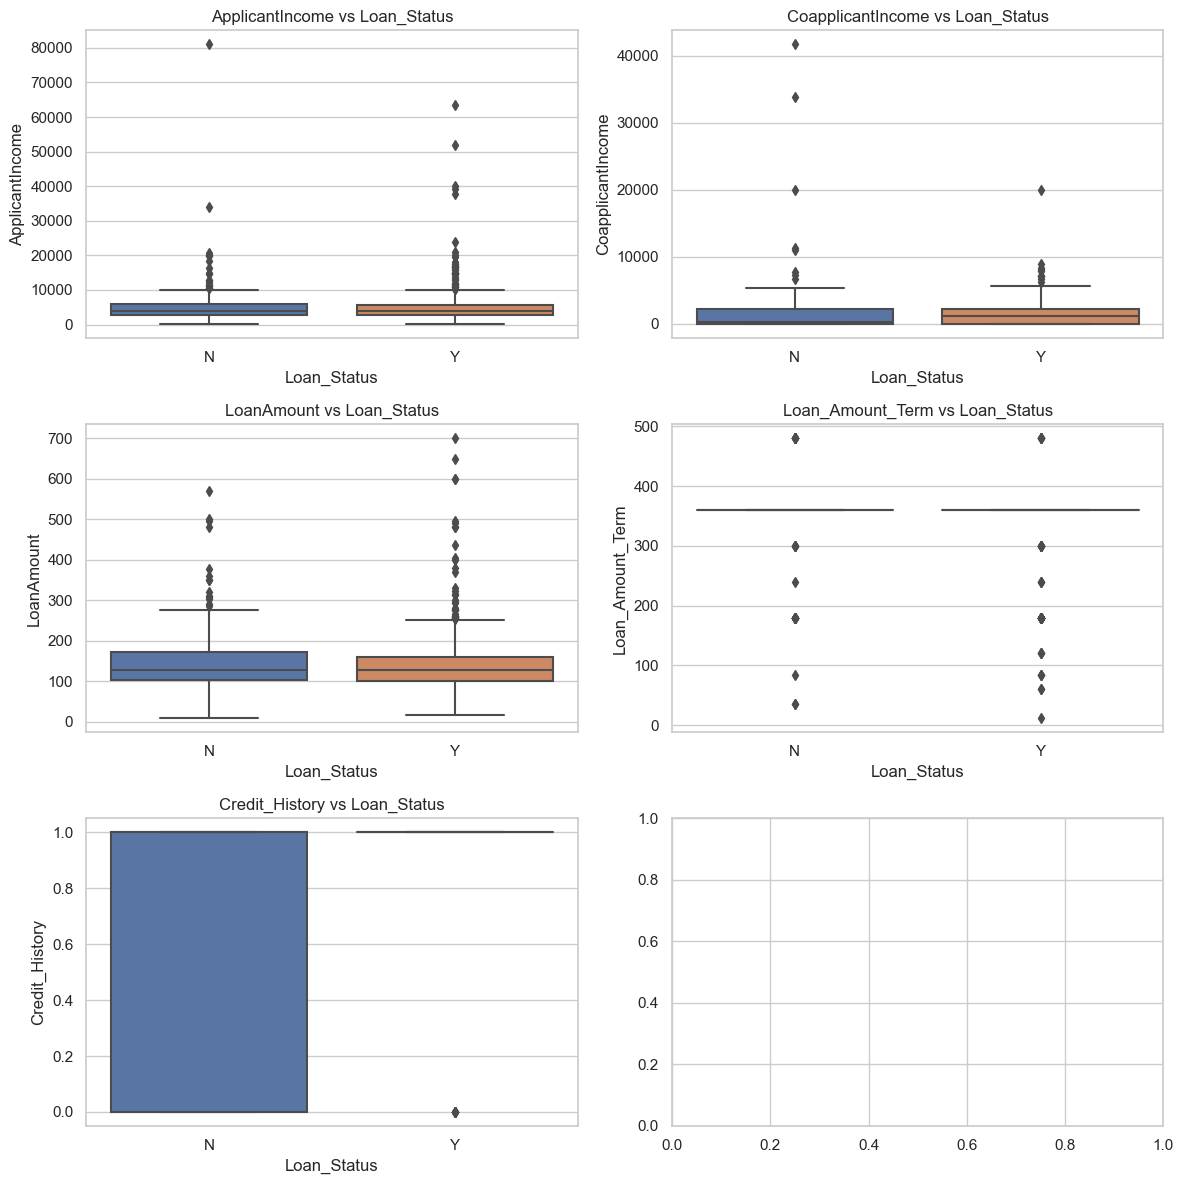

In [160]:
# Plot relationships between numerical features and Loan_Status
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='Loan_Status', y=feature, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{feature} vs Loan_Status')
plt.tight_layout()

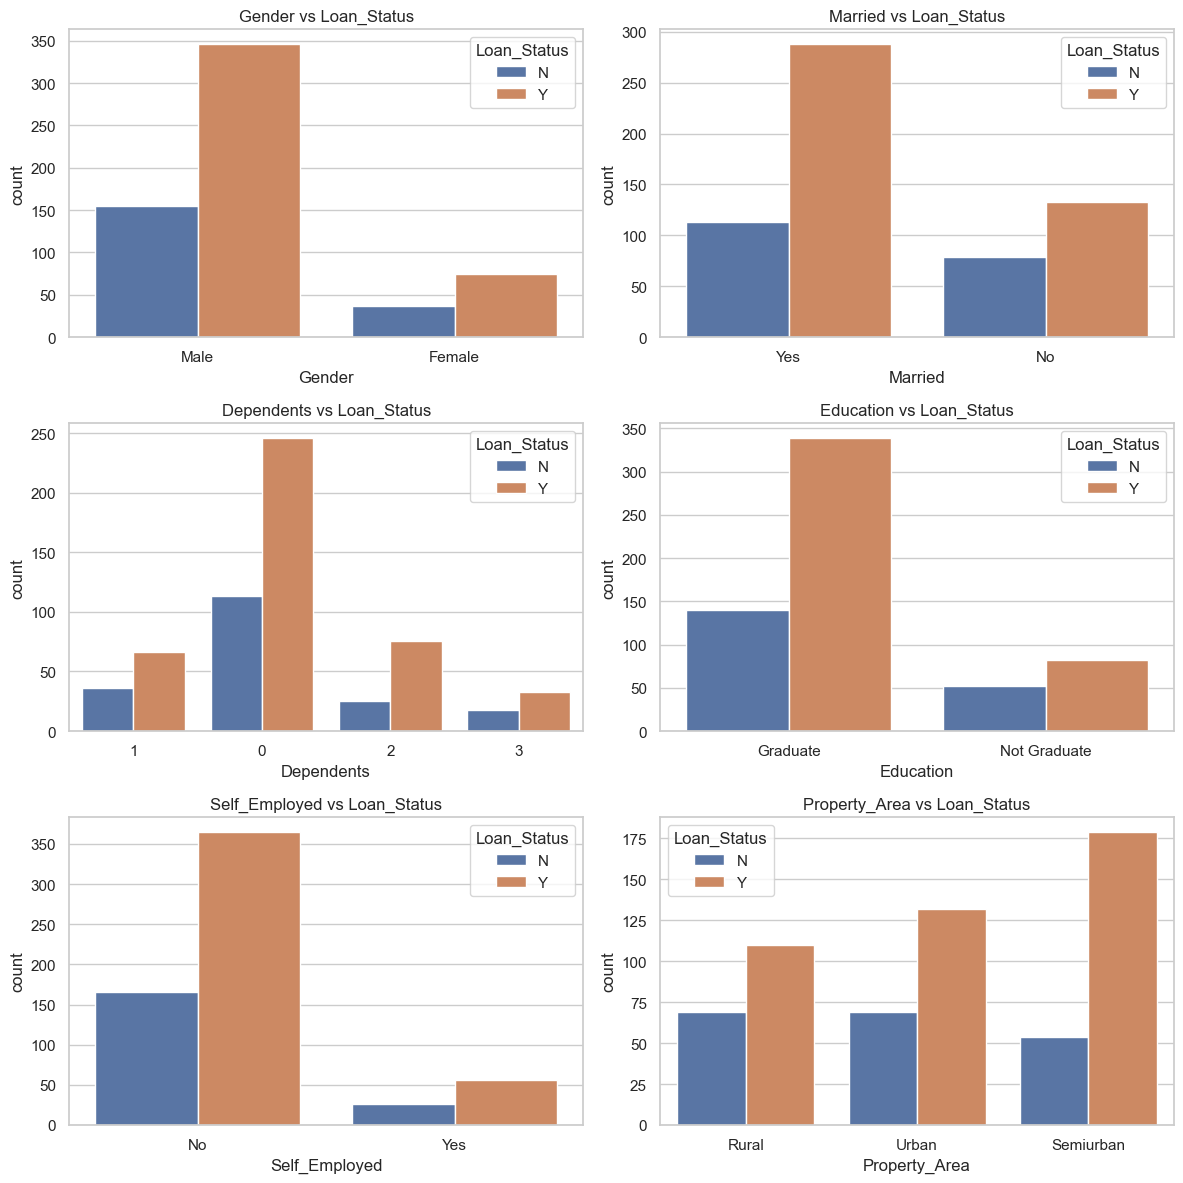

In [161]:
# Plot relationships between categorical features and Loan_Status
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='Loan_Status', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{feature} vs Loan_Status')
plt.tight_layout()

In [162]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Encode target variable
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               613 non-null    object 
 1   ApplicantIncome          613 non-null    int64  
 2   CoapplicantIncome        613 non-null    float64
 3   LoanAmount               613 non-null    float64
 4   Loan_Amount_Term         613 non-null    float64
 5   Credit_History           613 non-null    float64
 6   Loan_Status              613 non-null    int64  
 7   Gender_Male              613 non-null    uint8  
 8   Married_Yes              613 non-null    uint8  
 9   Education_Not Graduate   613 non-null    uint8  
 10  Self_Employed_Yes        613 non-null    uint8  
 11  Property_Area_Semiurban  613 non-null    uint8  
 12  Property_Area_Urban      613 non-null    uint8  
dtypes: float64(4), int64(2), object(1), uint8(6)
memory usage: 37.2+ KB


In [164]:
# Features and target variable
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [165]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [166]:
X['Dependents'].value_counts()

0    359
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [167]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
1,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
2,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
3,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1
4,2,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0
609,3,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0
610,1,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,1
611,2,7583,0.0,187.0,360.0,1.0,1,1,0,0,0,1


In [168]:
y.value_counts()

1    421
0    192
Name: Loan_Status, dtype: int64

# Model training

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score,f1_score

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [177]:
# hyperparameters for each model
params = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3,5,7], 'min_samples_split': [2, 10, 20]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'k-NN': {'n_neighbors': [3, 5, 7, 9]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
}

In [178]:
# Grid Search
def grid_search_cv(model, params, X_train, y_train):
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

In [ ]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    best_model = grid_search_cv(model, params[model_name], X_train, y_train)
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

Training Logistic Regression...


/Users/geetanjalijoshi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/geetanjalijoshi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Logistic Regression Accuracy: 78.05%
Training Decision Tree...
Decision Tree Accuracy: 77.24%
Training SVM...


In [181]:
# Display the results
print("\nModel Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy * 100:.2f}%")


Model Comparison:
Logistic Regression: 78.05%
Decision Tree: 77.24%
SVM: 77.24%
k-NN: 62.60%
Gradient Boosting: 77.24%


In [182]:
# the best model comes out to be Logistic Regression: 78.05%.